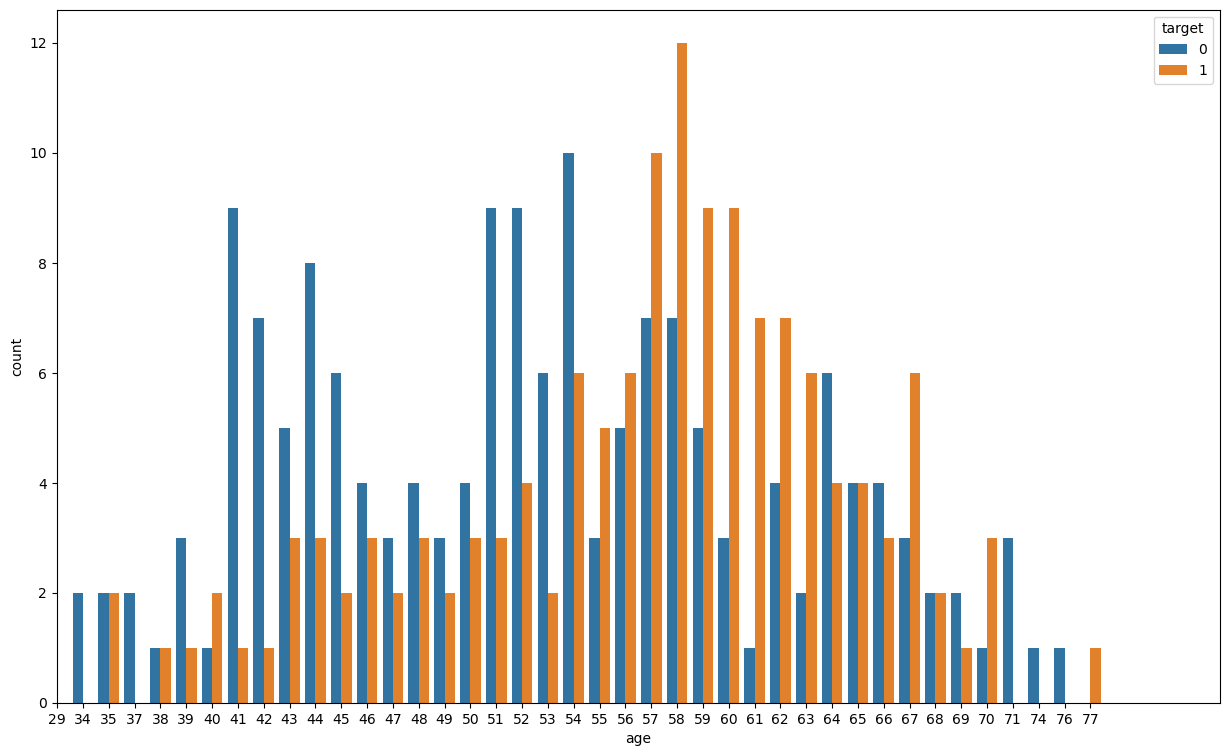

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns 

df = pd.read_csv('../data/cleveland.csv')

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
               'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Map target values
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Fill NaN values
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

# Visualize distribution of target vs age
plt.figure(figsize=(15, 9))
sns.countplot(x='age', hue='target', data=df)
plt.xlim(0, 45)
plt.show()


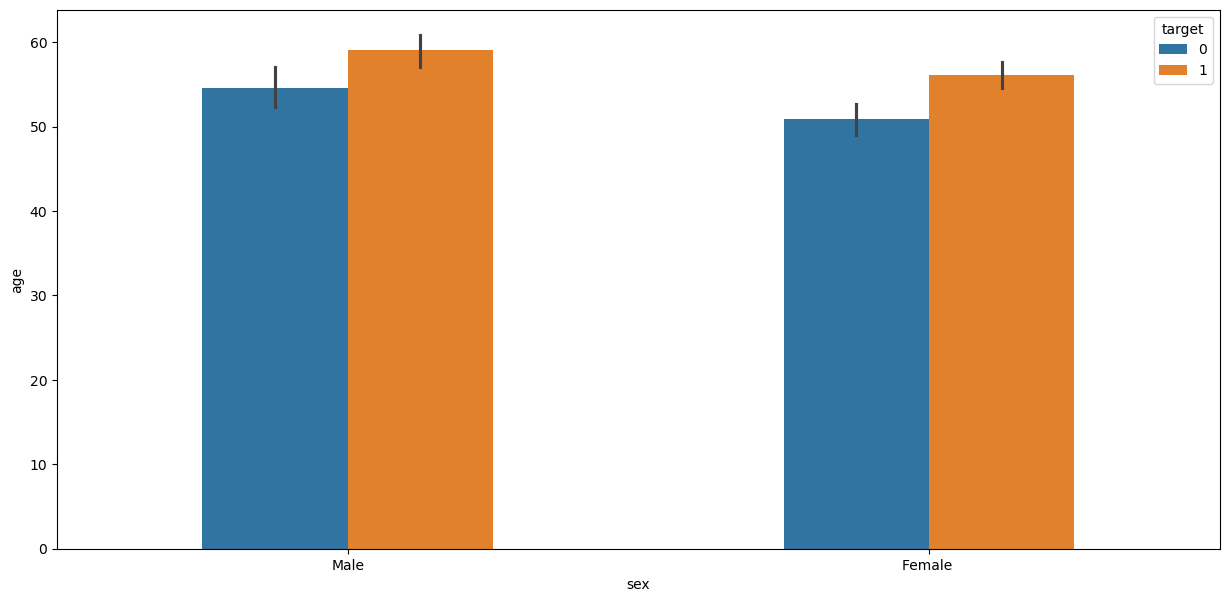

In [3]:
#barplot of age, sex and hue = target


plt.figure(figsize=(15, 7))
plt.xticks(ticks=[0, 1], labels=['Male', 'Female '])
sns.barplot(df, x='sex', y ='age', hue='target', width=0.5)
plt.show() 

In [6]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Use KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print('Train Accuracy: ', (cm_train[0, 0] + cm_train[1, 1]) / len(y_train))
print('Test Accuracy: ', (cm_test[0, 0] + cm_test[1, 1]) / len(y_test))

Train Accuracy:  0.7593360995850622
Test Accuracy:  0.6065573770491803


In [7]:
#Use SVM
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=201)

from sklearn.svm import SVC

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print('Train Accuracy: ', round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train),2))
print('Test Accuracy: ', round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test),2))

Train Accuracy:  0.71
Test Accuracy:  0.69


In [10]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print('Train Accuracy: ', round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train),2))
print('Test Accuracy: ', round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test),2))


Train Accuracy:  0.85
Test Accuracy:  0.87


In [13]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=10,
                            min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print('Train Accuracy: ', round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train),2))
print('Test Accuracy: ', round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test),2))


Train Accuracy:  1.0
Test Accuracy:  0.77


In [14]:
#Use Random Forest
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=10, min_samples_split=2)

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print('Train Accuracy: ', round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train),3))
print('Test Accuracy: ', round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test),3))

Train Accuracy:  0.996
Test Accuracy:  0.803


In [34]:
#Use AdaBoost
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)

ada.fit(X_train, y_train)

y_pred_train = ada.predict(X_train)
y_pred_test = ada.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print('Train Accuracy: ', round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train),3))
print('Test Accuracy: ', round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test),3))

Train Accuracy:  0.859
Test Accuracy:  0.836


In [17]:
#Use GradientBoost
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,
                                min_samples_split=2, random_state=42, subsample=1.0)

gb.fit(X_train, y_train)


y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print('Train Accuracy: ', round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train),3))
print('Test Accuracy: ', round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test),3))

Train Accuracy:  0.992
Test Accuracy:  0.82


In [16]:
#Use XGBoost
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, objective='binary:logistic', random_state=42)

xgb.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print('Train Accuracy: ', round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train),3))
print('Test Accuracy: ', round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test),3))

Train Accuracy:  0.996
Test Accuracy:  0.803


In [47]:
#USe stacking
from sklearn.ensemble import StackingClassifier

estimators = [('knn', knn), ('svc', svc), ('rf', rf), ('ada', ada), ('gb', gb), ('xgb', xgb)]

stack = StackingClassifier(estimators=estimators, final_estimator=svc)

stack.fit(X_train, y_train)

y_pred_train = stack.predict(X_train)
y_pred_test = stack.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print('Train Accuracy: ', round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train),3))
print('Test Accuracy: ', round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test),3))


Train Accuracy:  0.992
Test Accuracy:  0.836


In [44]:

#Use Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)    
ada = AdaBoostClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)

from sklearn.ensemble import StackingClassifier

estimators = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('xgb', xgb), ('gc', gc), ('ada', ada), ('svc', svc)]

stack = StackingClassifier(estimators=estimators, final_estimator=rfc)

stack.fit(X_train, y_train)

y_pred_train = stack.predict(X_train)
y_pred_test = stack.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print('Train Accuracy: ', round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train),3))
print('Test Accuracy: ', round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test),3))


Train Accuracy:  0.992
Test Accuracy:  0.787
